In [70]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib in line

UsageError: unrecognized arguments: line


In [2]:
data=pd.read_excel("QVI_transaction_data.xlsx") 

In [3]:
data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [29]:
pur_data=pd.read_csv("QVI_purchase_behaviour.csv")

In [30]:
pur_data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


# SUMMARIZATION

In [4]:
data.describe()#using the describe function to summarize the data 

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,264836.000000,264836.00000,2.648360e+05,2.648360e+05,264836.000000,264836.000000,264836.000000
mean,43464.036260,135.08011,1.355495e+05,1.351583e+05,56.583157,1.907309,7.304200
std,105.389282,76.78418,8.057998e+04,7.813303e+04,32.826638,0.643654,3.083226
min,43282.000000,1.00000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.500000
25%,43373.000000,70.00000,7.002100e+04,6.760150e+04,28.000000,2.000000,5.400000
50%,43464.000000,130.00000,1.303575e+05,1.351375e+05,56.000000,2.000000,7.400000
75%,43555.000000,203.00000,2.030942e+05,2.027012e+05,85.000000,2.000000,9.200000
max,43646.000000,272.00000,2.373711e+06,2.415841e+06,114.000000,200.000000,650.000000


In [32]:
data.isnull().sum()#checking for null values

DATE              0
STORE_NBR         0
LYLTY_CARD_NBR    0
TXN_ID            0
PROD_NBR          0
PROD_NAME         0
PROD_QTY          0
TOT_SALES         0
dtype: int64

/tmp/ipykernel_4462/2681103758.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

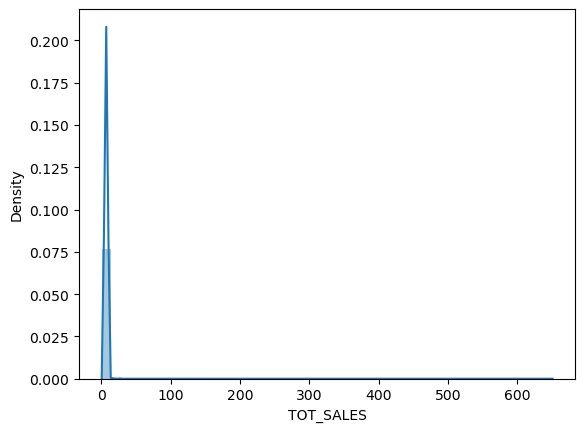

In [9]:
#to check whether any outliers are present in the TOT_SALES 
sns.distplot(data.TOT_SALES,kde=True)

In [10]:
#to remove outliers we are converting the dataset into numeric dataset
numeric_data=data.select_dtypes(['float','int'])

In [12]:
numeric_data.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,2,6.0
1,43599,1,1307,348,66,3,6.3
2,43605,1,1343,383,61,2,2.9
3,43329,2,2373,974,69,5,15.0
4,43330,2,2426,1038,108,3,13.8


# REMOVING OUTLIERS

In [22]:

x=numeric_data[numeric_data['TOT_SALES']<8.000] # mean for TOT sales is 7.3 we can take upto 10 as a limit

/tmp/ipykernel_4462/2076764446.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x.TOT_SALES,kde=True)


<Axes: xlabel='TOT_SALES', ylabel='Density'>

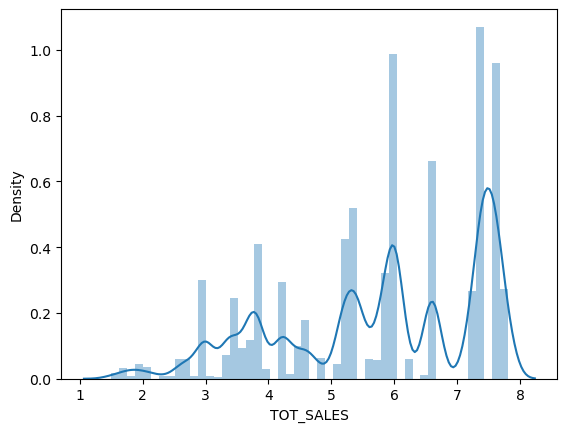

In [23]:
sns.distplot(x.TOT_SALES,kde=True)

# CHECKING DATA FORMATS

In [21]:
data.dtypes

DATE                int64
STORE_NBR           int64
LYLTY_CARD_NBR      int64
TXN_ID              int64
PROD_NBR            int64
PROD_NAME          object
PROD_QTY            int64
TOT_SALES         float64
dtype: object

# DERIVE FEATURES

In [53]:
from datetime import date, timedelta

# Assuming 'data' is your DataFrame and 'DATE' is the column containing Excel serial dates
start = date(1899, 12, 30)
new_date_format = []

for excel_date in data['DATE']:
    delta = timedelta(days=excel_date)
    new_date_format.append(start + delta)


In [55]:
data["DATE"] = pd.to_datetime(pd.Series(new_date_format))
print(data["DATE"].dtype)

datetime64[ns]


In [56]:
data["PROD_NAME"].unique()

array(['Natural Chip        Compny SeaSalt175g',
       'CCs Nacho Cheese    175g',
       'Smiths Crinkle Cut  Chips Chicken 170g',
       'Smiths Chip Thinly  S/Cream&Onion 175g',
       'Kettle Tortilla ChpsHny&Jlpno Chili 150g',
       'Smiths Crinkle Chips Salt & Vinegar 330g',
       'Grain Waves         Sweet Chilli 210g',
       'Doritos Corn Chip Mexican Jalapeno 150g',
       'Grain Waves Sour    Cream&Chives 210G',
       'Kettle Sensations   Siracha Lime 150g',
       'Twisties Cheese     270g', 'WW Crinkle Cut      Chicken 175g',
       'Thins Chips Light&  Tangy 175g', 'CCs Original 175g',
       'Burger Rings 220g', 'NCC Sour Cream &    Garden Chives 175g',
       'Doritos Corn Chip Southern Chicken 150g',
       'Cheezels Cheese Box 125g', 'Smiths Crinkle      Original 330g',
       'Infzns Crn Crnchers Tangy Gcamole 110g',
       'Kettle Sea Salt     And Vinegar 175g',
       'Smiths Chip Thinly  Cut Original 175g', 'Kettle Original 175g',
       'Red Rock Deli Thai  C

In [57]:
import pandas as pd
from collections import Counter

# Assuming transaction is your DataFrame
freq = Counter(word for name in data["PROD_NAME"] for word in name.split())

# Create a DataFrame from the Counter
fre = pd.DataFrame(freq.items(), columns=['Word', 'Frequency'])

# Filter out digits and ampersands
fre = fre[~fre['Word'].str[0].str.isdigit() & (fre['Word'] != '&')]

# Sort by frequency in descending order
fre = fre.sort_values(by='Frequency', ascending=False)

# Display the most frequent words
print(fre.head())


      Word  Frequency
11   Chips      49770
16  Kettle      41288
21    Salt      27976
6   Cheese      27890
8   Smiths      27390


In [58]:
data.describe()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_QTY,TOT_SALES
count,229825,246740.000000,2.467400e+05,2.467400e+05,246740.000000,246740.000000,246740.000000
mean,2018-12-30 00:29:27.285543680,135.050361,1.355303e+05,1.351304e+05,56.352213,1.906456,7.316113
min,2018-07-01 00:00:00,1.000000,1.000000e+03,1.000000e+00,1.000000,1.000000,1.700000
25%,2018-09-30 00:00:00,70.000000,7.001500e+04,6.756875e+04,26.000000,2.000000,5.800000
50%,2018-12-30 00:00:00,130.000000,1.303670e+05,1.351815e+05,53.000000,2.000000,7.400000
75%,2019-03-31 00:00:00,203.000000,2.030832e+05,2.026522e+05,87.000000,2.000000,8.800000
max,2019-06-30 00:00:00,272.000000,2.373711e+06,2.415841e+06,114.000000,5.000000,29.500000
std,NaN,76.786971,8.071520e+04,7.814760e+04,33.695235,0.342499,2.474897


In [61]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 246740 entries, 0 to 264835
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   DATE            229825 non-null  datetime64[ns]
 1   STORE_NBR       246740 non-null  int64         
 2   LYLTY_CARD_NBR  246740 non-null  int64         
 3   TXN_ID          246740 non-null  int64         
 4   PROD_NBR        246740 non-null  int64         
 5   PROD_NAME       246740 non-null  object        
 6   PROD_QTY        246740 non-null  int64         
 7   TOT_SALES       246740 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 16.9+ MB


In [59]:
data[data['PROD_QTY']>5]

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES


In [60]:
data.drop(labels=data[data['PROD_QTY']==200].index,inplace=True)
#transaction.drop(labels=transaction[transaction['TOT_SALES']>600].index,inplace=True)
#transaction.drop(labels=transaction[transaction['TXN_ID']>1500000].index,inplace=True)

#missing dates

ts=data.groupby('DATE').count()
ts.head()



,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
DATE,,,,,,,
2018-07-01,622,622,622,622,622,622,622
2018-07-02,606,606,606,606,606,606,606
2018-07-03,629,629,629,629,629,629,629
2018-07-04,615,615,615,615,615,615,615
2018-07-05,620,620,620,620,620,620,620


In [64]:
#missing date 
set(pd.date_range('2018-07-01', end='2019-06-30',freq='D'))-set((ts.index))


{Timestamp('2018-12-25 00:00:00')}

In [65]:
ts.loc['2018-12-25'] = np.nan


In [66]:
missing_date_value = ts.loc['2018-12-25']
print(missing_date_value)


STORE_NBR        NaN
LYLTY_CARD_NBR   NaN
TXN_ID           NaN
PROD_NBR         NaN
PROD_NAME        NaN
PROD_QTY         NaN
TOT_SALES        NaN
Name: 2018-12-25, dtype: float64
